<a href="https://colab.research.google.com/github/LuSant22/Capstone-Project-Assesment/blob/master/Best_characteristics_recommendation_for_Airbnb_in_Amsterdam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Best characteristics recommendation for Airbnb in Amsterdam

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)


## Introduction: Business Problem <a name="introduction"></a>

With the boom of Airbnb, many entrepreneurs want to get inside the business and may of them do not know where to start. The main problem is that they may not have a house or apartment but they want to buy or rent one to start an Airbnb business but they do not know where, so I will make an analysis in the Airbnb's inside the city of Amsterdam within many features that will give a recommendation about which zone is better to buy/rent a house and start an airbnb business based on ratings, cost and many other features 

## Data <a name="data"></a>

The data is an open-source non-commercial licensed with many features about Airbnb in the city of Amsterdam extracted from http://insideairbnb.com/ that offers really valuable information about the topic. This dataset contains information of more than 20k airbnbs around Amsterdam, so the metrics will be accurate, but it will be necessary to clean and prepare the data.



### Getting and showing data

In [1]:
import csv
import urllib.request as urllib2
import pandas as pd
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt


mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

url = 'http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2019-12-07/data/listings.csv.gz'



Matplotlib version:  3.1.3


In [2]:
rawdata = pd.read_csv(url)
rawdata.head(5)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20191207212953,2019-12-08,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",From week 38 to week 47 maintenance work to th...,The neighbourhood is well served by 24 hours p...,NaN,NaN,Please: - Leave your shoes in the entrance - ...,NaN,NaN,https://a0.muscache.com/im/pictures/10272854/8...,NaN,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",within an hour,100%,NaN,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Amsterdam, North Holland, Netherlands",Indische Buurt,Oostelijk Havengebied - Indische Buurt,...,$20.00,3,15,3,3,1125,1125,3.0,1125.0,2 months ago,t,0,0,0,0,2019-12-08,277,29,2009-03-30,2019-11-21,98.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.13
1,20168,https://www.airbnb.com/rooms/20168,20191207212953,2019-12-08,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,For those who like all facets of city life. In...,17th century Dutch townhouse in the heart of t...,none,Located just in between famous central canals....,Check-in time from 2pm till 10pm (But it doesn...,No need to use any transport! All is within a ...,NaN,"No curfew, free entrance 27/7 with your own ke...",This studio/room takes entire floor and has it...,NaN,NaN,https://a0.muscache.com/im/pictures/69979664/3...,NaN,59484,https://www.airbnb.com/users/show/59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",Secondary phone nr. + (Phone number hidden by ...,within an hour,100%,NaN,f,https://a0.muscache.com/im/pictures/user/579c8...,https://a0.muscache.com/im/pictures/user/579c8...,Grachtengordel,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Amsterdam, North Holland, Netherlands",Grachtengordel,Centrum-Oost,...,$0.00,1,1000,1,4,1000,1000,3.7,1000.0,yesterday,t,4,21,51,198,2019-12-08,306,71,2010-03-02,2019-12-05,89.0,10.0,10.0,10.0,10.0,10.0,9.0,f,NaN,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",f,f,strict_14_with_grace_period,f,f,2,0,2,0,2.57
2,25428,https://www.airbnb.com/rooms/25428,20191207

In [3]:
rawdata.shape

(20025, 106)

## Cleaning Data



We drop NaN values and we check each type of data so we can use correctly the trainning algorithm

In [0]:
New_df= rawdata.drop(columns=['is_business_travel_ready',	'cancellation_policy',	'require_guest_profile_picture',	'require_guest_phone_verification',	
                   'calculated_host_listings_count',	'calculated_host_listings_count_entire_homes',
                   'calculated_host_listings_count_private_rooms',	'calculated_host_listings_count_shared_rooms',
                   'requires_license',	'license',	'jurisdiction_names',	'instant_bookable', 'calendar_updated',	'has_availability',
                   'availability_30', 'availability_60', 'availability_90',	'availability_365',	'calendar_last_scraped', 
                   'minimum_nights_avg_ntm',	'maximum_nights_avg_ntm', 'neighbourhood_cleansed',
                   'maximum_nights', 'minimum_minimum_nights',
                   'maximum_minimum_nights','minimum_maximum_nights', 'security_deposit','weekly_price','monthly_price',
                   'bed_type', 'amenities','square_feet','room_type','accommodates', 	'neighbourhood_group_cleansed'
                   ,'host_listings_count',	'host_total_listings_count', 'host_verifications',	'host_has_profile_pic',	'host_identity_verified',
                   'host_since',	'host_location',	'host_about',	'host_response_time',		'host_acceptance_rate',	'host_is_superhost',
                   'host_thumbnail_url', 'host_picture_url', 'host_url',	'host_name', 'host_since',	'host_location',	'host_about',
                   'host_response_time',	'host_response_rate', 'experiences_offered',	'neighborhood_overview',	'notes',	'transit',
                   'access',	'interaction',	'house_rules',	'thumbnail_url',	'medium_url',	'picture_url',	'xl_picture_url',	'host_id',
                   'listing_url',	'scrape_id',	'last_scraped',	'name',	'summary',	'space',	'description', 'city',	'state', 'host_neighbourhood',
                   'street', 'smart_location', 'country_code', 'country', 'market', 'review_scores_cleanliness', 'review_scores_communication',
                   'is_location_exact', 'zipcode', 'property_type', 'id',
                   'cleaning_fee','review_scores_accuracy', 'review_scores_value', 'maximum_maximum_nights','neighbourhood', 'number_of_reviews'



                   ])

In [5]:
New_df = New_df.dropna()
New_df = New_df.reset_index(drop=True)
New_df.dtypes

latitude                  float64
longitude                 float64
bathrooms                 float64
bedrooms                  float64
beds                      float64
price                      object
guests_included             int64
extra_people               object
minimum_nights              int64
number_of_reviews_ltm       int64
first_review               object
last_review                object
review_scores_rating      float64
review_scores_checkin     float64
review_scores_location    float64
reviews_per_month         float64
dtype: object

In [6]:
len(New_df)

17362

 Here we turn the field "price" and "Extra_people" that is a string into a float

In [0]:
Price=[]
Extra_people=[]
for i in range(len(New_df)):

    newprice= float((New_df.price[i][1:]).replace(',','')) 
    Price.append(newprice)
    extrapeopleprice=float((New_df.extra_people[i][1:]).replace(',','')) 
    Extra_people.append(extrapeopleprice)

New_df['Extra_people']=Extra_people
New_df['Price']=Price

In [8]:
print('\nhighest values\n\n',New_df.Price.sort_values().tail(10))
print('\nlowest values\n\n',New_df.Price.sort_values().head(100))


highest values

 8102     1600.0
235      1750.0
13960    2000.0
13846    3000.0
2610     4500.0
14234    5040.0
105      8000.0
3249     8915.0
121      9000.0
118      9000.0
Name: Price, dtype: float64

lowest values

 10545     0.0
3299      7.0
15225     9.0
14938    10.0
2077     12.0
         ... 
16143    39.0
2816     39.0
15404    40.0
2655     40.0
2672     40.0
Name: Price, Length: 100, dtype: float64


In [9]:
print('\nhighest values\n\n',New_df.minimum_nights.sort_values().tail(100))



highest values

 2121       28
3919       28
334        28
12271      29
7355       29
         ... 
13846     365
499       500
1786      999
9417     1001
14672    1001
Name: minimum_nights, Length: 100, dtype: int64


 Here we will filter some values that are undervalued or overvalued (in price and min nights features), so we will use only real values

In [10]:
Real_prices=[]
List2drop=[]
minnights2drop=[]

for row in range(len(New_df)):

    if(New_df.Price[row] >= 30 and New_df.Price[i] <= 1000): #RANGE OF USEFUL PRICES
      Realprice=New_df.Price
 
    else:
        List2drop.append(row)  #List to drop certain rows in the Dataframe



PriceCln_AmsDf= New_df.drop(List2drop,axis=0) #drop those values that are not useful
PriceCln_AmsDf = PriceCln_AmsDf.reset_index(drop=True)

for row in range(len(PriceCln_AmsDf)):
    if(PriceCln_AmsDf.minimum_nights[row] <= 29): #RANGE OF USEFUL PRICES
        Realpmin_nights=PriceCln_AmsDf.Price
      
   
    else:
          minnights2drop.append(row)  

Clean_AmsDf= PriceCln_AmsDf.drop(minnights2drop,axis=0) #drop those values that are not useful
Clean_AmsDf = Clean_AmsDf.reset_index(drop=True)
Clean_AmsDf


,latitude,longitude,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_checkin,review_scores_location,reviews_per_month,Extra_people,Price
0,52.36575,4.94142,1.5,1.0,2.0,$59.00,1,$20.00,3,29,2009-03-30,2019-11-21,98.0,10.0,9.0,2.13,20.0,59.0
1,52.36509,4.89354,1.0,1.0,1.0,$80.00,2,$0.00,1,71,2010-03-02,2019-12-05,89.0,10.0,10.0,2.57,0.0,80.0
2,52.37297,4.88339,1.0,1.0,1.0,$125.00,2,$10.00,14,2,2018-01-21,2019-05-11,100.0,10.0,10.0,0.13,10.0,125.0
3,52.38673,4.89208,1.0,1.0,1.0,$155.00,1,$0.00,2,35,2012-01-09,2019-11-11,99.0,10.0,10.0,2.14,0.0,155.0
4,52.36719,4.89092,1.0,1.0,1.0,$75.00,1,$0.00,2,105,2010-08-22,2019-11-23,98.0,10.0,10.0,2.81,0.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17229,52.37651,4.88379,1.5,2.0,2.0,$150.00,1,$0.00,2,1,2019-12-03,2019-12-03,100.0,10.0,10.0,1.00,0.0,150.0
17230,52.37017,4.87579,1.5,2.0,3.0,$250.00,1,$0.00,1,1,2019-12-01,2019-12-01,100.0,10.0,10.0,1.00,0.0,250.0
17231,52.35080,4.85118,1.0,1.0,1.0,$30.00,1,$0.00,1,2,2019-12-03,2019-12-05,90.0,10.0,9.0,2.00,0.0,30.0
17232,52.36660,4.90927,1.0,1.0,1.0,$65.00,1,$0.00,1,1,2019-12-07,2019-12-07,80.0,10.0,10.0,1.00,0.0,65.0


# Methodology <a name="methodology"></a>

### Feature Selection

For the feature selection step it was necessary to drop many features (columns in the dataset) that were not useful to cluster the data. 
There were a lot of extra features for example “cancellation_policy” that was the cancellation policy for the property in text, it was dropped because we can’t process that information to make clusters. 


In [0]:
Clean_AmsDf= Clean_AmsDf.drop(columns=['first_review', 'last_review','price','extra_people'])

In [12]:
Clean_AmsDf.dtypes   # All values are numerical

latitude                  float64
longitude                 float64
bathrooms                 float64
bedrooms                  float64
beds                      float64
guests_included             int64
minimum_nights              int64
number_of_reviews_ltm       int64
review_scores_rating      float64
review_scores_checkin     float64
review_scores_location    float64
reviews_per_month         float64
Extra_people              float64
Price                     float64
dtype: object

 So now we have our clean dataset

In [13]:
Clean_AmsDf


,latitude,longitude,bathrooms,bedrooms,beds,guests_included,minimum_nights,number_of_reviews_ltm,review_scores_rating,review_scores_checkin,review_scores_location,reviews_per_month,Extra_people,Price
0,52.36575,4.94142,1.5,1.0,2.0,1,3,29,98.0,10.0,9.0,2.13,20.0,59.0
1,52.36509,4.89354,1.0,1.0,1.0,2,1,71,89.0,10.0,10.0,2.57,0.0,80.0
2,52.37297,4.88339,1.0,1.0,1.0,2,14,2,100.0,10.0,10.0,0.13,10.0,125.0
3,52.38673,4.89208,1.0,1.0,1.0,1,2,35,99.0,10.0,10.0,2.14,0.0,155.0
4,52.36719,4.89092,1.0,1.0,1.0,1,2,105,98.0,10.0,10.0,2.81,0.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17229,52.37651,4.88379,1.5,2.0,2.0,1,2,1,100.0,10.0,10.0,1.00,0.0,150.0
17230,52.37017,4.87579,1.5,2.0,3.0,1,1,1,100.0,10.0,10.0,1.00,0.0,250.0
17231,52.35080,4.85118,1.0,1.0,1.0,1,1,2,90.0,10.0,9.0,2.00,0.0,30.0
17232,52.36660,4.90927,1.0,1.0,1.0,1,1,1,80.0,10.0,10.0,1.00,0.0,65.0



# Analysis <a name="analysis"></a>

### Correlation among features

In [14]:
Clean_AmsDf[Clean_AmsDf.columns[1:]].corr()['reviews_per_month'][:]

longitude                 0.014656
bathrooms                -0.012838
bedrooms                 -0.145813
beds                     -0.055464
guests_included          -0.012148
minimum_nights           -0.155830
number_of_reviews_ltm     0.857106
review_scores_rating      0.002733
review_scores_checkin     0.050958
review_scores_location    0.104955
reviews_per_month         1.000000
Extra_people              0.004368
Price                    -0.013269
Name: reviews_per_month, dtype: float64

### Correlation Matrix

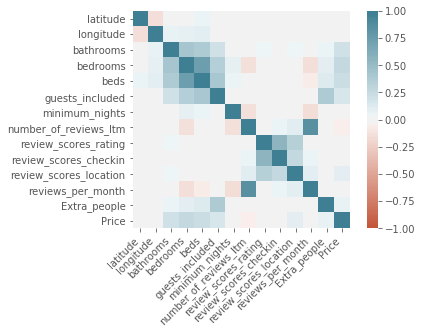

In [15]:
import seaborn as sns
corr = Clean_AmsDf.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

As we can observe in the correlation matrix we can observe that there are many features that are not correlated among them but some have certain relationship, like in the case of “number_of_reviews_ltm” that is the number of reviews in the las twelve months it is obviously correlated to “reviews_per_month”. Also, some of the features had a relationship, just like bathrooms, beds and bedrooms because we know that while more bedrooms more beds and bathrooms.

### Histogram

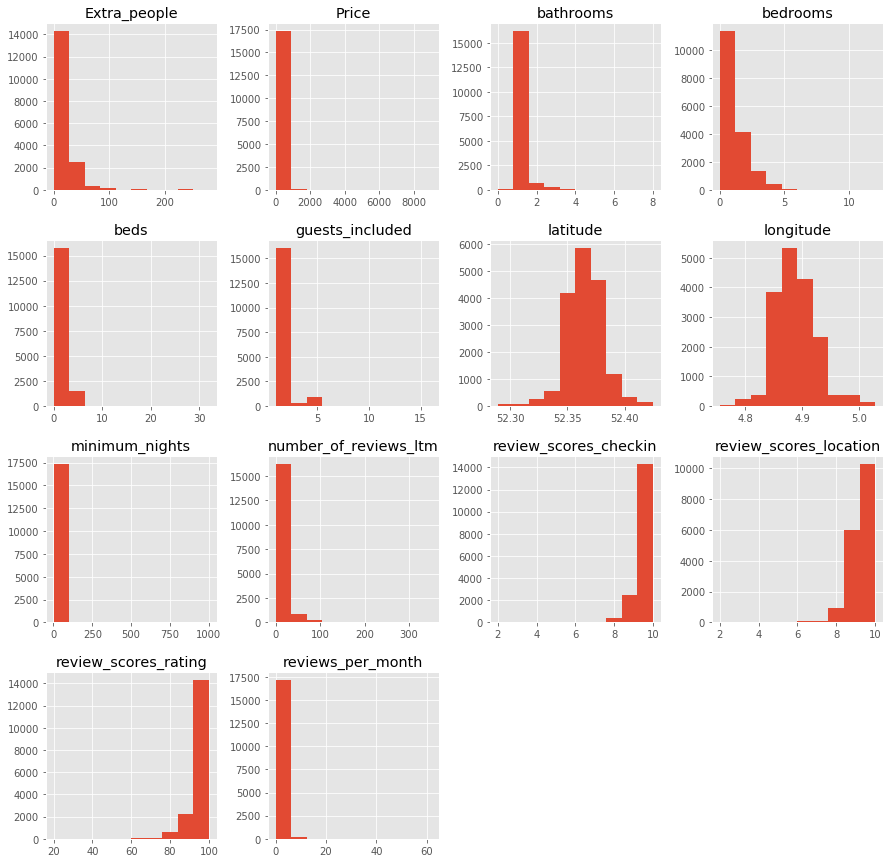

In [16]:

New_df.hist(figsize = (15, 15))
plt.show()

In [0]:
Trainning_DF= Clean_AmsDf.drop(columns=['latitude', 'longitude'])

In [18]:
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.cluster import KMeans 


print('Libraries imported.')

Libraries imported.


In [19]:
from sklearn.preprocessing import StandardScaler

X = Trainning_DF.values[:,1:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
print(np.isnan(cluster_dataset)) #Check for NaN values

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [0]:
num_clusters = 10

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

In [21]:
Clean_AmsDf["Labels"] = labels
Clean_AmsDf.head(10)

,latitude,longitude,bathrooms,bedrooms,beds,guests_included,minimum_nights,number_of_reviews_ltm,review_scores_rating,review_scores_checkin,review_scores_location,reviews_per_month,Extra_people,Price,Labels
0,52.36575,4.94142,1.5,1.0,2.0,1,3,29,98.0,10.0,9.0,2.13,20.0,59.0,1
1,52.36509,4.89354,1.0,1.0,1.0,2,1,71,89.0,10.0,10.0,2.57,0.0,80.0,3
2,52.37297,4.88339,1.0,1.0,1.0,2,14,2,100.0,10.0,10.0,0.13,10.0,125.0,9
3,52.38673,4.89208,1.0,1.0,1.0,1,2,35,99.0,10.0,10.0,2.14,0.0,155.0,6
4,52.36719,4.89092,1.0,1.0,1.0,1,2,105,98.0,10.0,10.0,2.81,0.0,75.0,3
5,52.36773,4.89151,1.0,1.0,1.0,1,2,85,95.0,10.0,10.0,4.39,0.0,55.0,3
6,52.35132,4.84838,1.0,3.0,3.0,4,3,0,95.0,10.0,9.0,0.32,30.0,219.0,0
7,52.37891,4.88321,1.0,1.0,1.0,2,3,11,96.0,10.0,10.0,0.79,75.0,180.0,2
8,52.36781,4.89001,1.0,1.0,1.0,1,3,36,98.0,10.0,10.0,4.11,0.0,159.0,3
9,52.37537,4.88932,1.0,2.0,4.0,2,3,200,98.0,8.0,10.0,7.30,60.0,210.0,3


In [22]:
Clean_AmsDf["Labels"].value_counts()

6    5184
1    4399
7    2915
2    1610
3    1253
0     933
5     689
9     216
4      30
8       5
Name: Labels, dtype: int64

In [23]:
AvgData= Clean_AmsDf.groupby('Labels').mean()
AvgData

,latitude,longitude,bathrooms,bedrooms,beds,guests_included,minimum_nights,number_of_reviews_ltm,review_scores_rating,review_scores_checkin,review_scores_location,reviews_per_month,Extra_people,Price
Labels,,,,,,,,,,,,,,
0,52.366363,4.894746,1.483923,2.747053,3.658092,4.207931,2.883173,5.464094,95.646302,9.859593,9.454448,0.695102,28.125402,251.639871
1,52.364973,4.887452,1.101500,1.163901,1.343033,1.269834,2.544669,3.925438,94.822687,9.789725,8.814276,0.651189,6.401455,116.600818
2,52.366130,4.888009,1.161801,1.381366,1.716149,2.048447,2.470807,6.260870,96.192547,9.874534,9.681366,0.844752,62.013665,169.373913
3,52.366465,4.890495,1.122107,0.981644,1.434158,1.369513,1.978452,55.114924,94.907422,9.849162,9.716680,4.893559,9.954509,114.154828
4,52.387782,4.911962,2.850000,7.466667,20.866667,8.033333,2.133333,10.633333,93.733333,9.633333,9.233333,1.110667,26.100000,487.166667
5,52.364944,4.889135,1.127721,1.351234,1.718433,1.329463,2.410740,2.521045,76.531205,7.853411,8.635704,0.498984,8.343977,139.811321
6,52.365333,4.887703,1.096451,0.953511,1.111304,1.153935,2.588156,4.551312,96.985532,9.879437,10.000000,0.729126,3.257716,133.960841
7,52.365507,4.894712,1.360720,2.510120,3.031561,1.275815,3.018182,4.194854,96.706346,9.868611,9.730360,0.612292,5.856261,227.642196
8,52.377582,4.889536,1.500000,1.600000,1.800000,2.000000,3.600000,11.000000,97.400000,10.000000,10.000000,1.450000,64.000000,7291.000000


In [24]:
 AvgData.reviews_per_month.groupby('Labels').mean()

Labels
0    0.695102
1    0.651189
2    0.844752
3    4.893559
4    1.110667
5    0.498984
6    0.729126
7    0.612292
8    1.450000
9    0.335324
Name: reviews_per_month, dtype: float64

In [25]:
MedianData= Clean_AmsDf.groupby('Labels').median()
MedianData

,latitude,longitude,bathrooms,bedrooms,beds,guests_included,minimum_nights,number_of_reviews_ltm,review_scores_rating,review_scores_checkin,review_scores_location,reviews_per_month,Extra_people,Price
Labels,,,,,,,,,,,,,,
0,52.363980,4.891100,1.5,3.0,3.0,4,3,3,97.0,10.0,10.0,0.48,25.0,220.0
1,52.364660,4.875320,1.0,1.0,1.0,1,2,2,96.0,10.0,9.0,0.45,0.0,109.0
2,52.366055,4.886435,1.0,1.0,2.0,2,2,4,97.0,10.0,10.0,0.64,50.0,150.0
3,52.367620,4.890850,1.0,1.0,1.0,1,2,51,96.0,10.0,10.0,4.51,0.0,95.0
4,52.394265,4.895975,2.0,7.5,18.0,8,2,8,95.0,10.0,9.0,0.88,32.5,472.0
5,52.364470,4.887590,1.0,1.0,1.0,1,2,0,80.0,8.0,9.0,0.23,0.0,120.0
6,52.364890,4.886250,1.0,1.0,1.0,1,2,3,98.0,10.0,10.0,0.52,0.0,125.0
7,52.363390,4.890770,1.0,2.0,3.0,1,3,3,98.0,10.0,10.0,0.43,0.0,200.0
8,52.376140,4.895580,1.0,1.0,1.0,1,3,8,98.0,10.0,10.0,0.93,0.0,8915.0


In [0]:
#This is for labeling the rows
Df4plot=pd.DataFrame() 
AvgData['Labels_']=range(10)


# Results and Discussion <a name="results"></a>

### Final results
Reviews per month vs labels

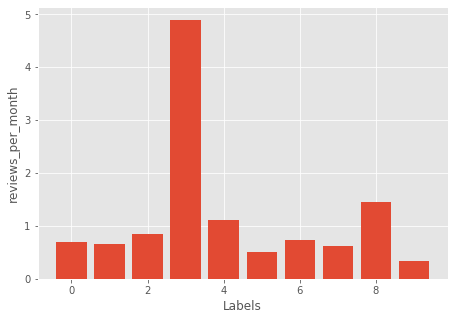

In [27]:

plt.figure(figsize=(25, 5))

plt.subplot(131)
plt.bar(AvgData['Labels_'], AvgData['reviews_per_month'])
plt.xlabel('Labels')
plt.ylabel('reviews_per_month')
plt.show()

In [38]:
# Obtaining the best cluster
counter=0
max_row=0
BetterResults= (AvgData.reviews_per_month)
for i in range(len(BetterResults)):
    
    if counter  < BetterResults[i]:
      max_row=i
      
      counter= BetterResults[i]  
print("the best cluster is: ",max_row)


the best cluster is:  3


It is shown below which are the best features for a succesful airbnb

In [29]:
Best_row_avg=AvgData.head(max_row+1)
Best_row_avg.tail(1)

,latitude,longitude,bathrooms,bedrooms,beds,guests_included,minimum_nights,number_of_reviews_ltm,review_scores_rating,review_scores_checkin,review_scores_location,reviews_per_month,Extra_people,Price,Labels_
Labels,,,,,,,,,,,,,,,
3,52.366465,4.890495,1.122107,0.981644,1.434158,1.369513,1.978452,55.114924,94.907422,9.849162,9.71668,4.893559,9.954509,114.154828,3


In [36]:
Best_row_median=MedianData.head(max_row+1)
Best_row_median.tail(1)

,latitude,longitude,bathrooms,bedrooms,beds,guests_included,minimum_nights,number_of_reviews_ltm,review_scores_rating,review_scores_checkin,review_scores_location,reviews_per_month,Extra_people,Price
Labels,,,,,,,,,,,,,,
3,52.36762,4.89085,1.0,1.0,1.0,1,2,51,96.0,10.0,10.0,4.51,0.0,95.0


As we can observe and analyze this label has much more reviews per month than the others. It obtained almost 5 reviews per month in comparison with the other labels that obtained values really close to "1". So we can conclude that with those features there is much more probability to have more guests during the year and in consequence more revenue.

### Creating another DF with only the best features 

In [0]:
WorstRows=[]
for i in range(len(Clean_AmsDf)):
    if(Clean_AmsDf['Labels'][i] != max_row):
       WorstRows.append(i)

In [31]:


LastDf= Clean_AmsDf.drop(WorstRows,axis=0) #drop those values that are not useful
LastDf = LastDf.reset_index(drop=True)
LastDf

,latitude,longitude,bathrooms,bedrooms,beds,guests_included,minimum_nights,number_of_reviews_ltm,review_scores_rating,review_scores_checkin,review_scores_location,reviews_per_month,Extra_people,Price,Labels
0,52.36509,4.89354,1.0,1.0,1.0,2,1,71,89.0,10.0,10.0,2.57,0.0,80.0,3
1,52.36719,4.89092,1.0,1.0,1.0,1,2,105,98.0,10.0,10.0,2.81,0.0,75.0,3
2,52.36773,4.89151,1.0,1.0,1.0,1,2,85,95.0,10.0,10.0,4.39,0.0,55.0,3
3,52.36781,4.89001,1.0,1.0,1.0,1,3,36,98.0,10.0,10.0,4.11,0.0,159.0,3
4,52.37537,4.88932,1.0,2.0,4.0,2,3,200,98.0,8.0,10.0,7.30,60.0,210.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,52.36825,4.86622,1.5,2.0,2.0,1,2,7,97.0,10.0,10.0,5.53,0.0,200.0,3
1249,52.38093,4.88509,1.0,0.0,1.0,1,1,11,95.0,10.0,10.0,11.00,0.0,100.0,3
1250,52.36077,4.90571,1.5,1.0,1.0,1,1,9,93.0,9.0,10.0,8.18,0.0,80.0,3
1251,52.36699,4.83888,1.5,1.0,1.0,1,1,10,98.0,10.0,10.0,8.11,20.0,40.0,3


## Plotting the winner airbnb's

In [32]:

import json # library to handle JSON files
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

/bin/bash: conda: command not found
Libraries imported.


In [33]:
address = 'Amsterdam, Netherlands'

geolocator = Nominatim(user_agent="To_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Amsterdam are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Amsterdam are 52.3727598, 4.8936041.


In [34]:
map_amsterdam = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(LastDf['latitude'], LastDf['longitude'],  LastDf ['Labels']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_amsterdam)  
    
map_amsterdam


# Conclusion <a name="conclusion"></a>

In this case study it was possible to determine and recommend which characteristics an Airbnb is better to has in order to get more clients and as of course more revenue. This approach show us how little things in a service that many people offer can be beneficial to know for staying ahead the competitors and the most important thing, that was the purpose of the project, is to give useful information to those who are looking to enter in this service and do not know which features a property should have. This project could be extended in determine other useful things for raise the probability of a successful Airbnb by analyzing other types of features such as name of the property, description, summary and mainly in property’s pictures because it has been studied a lot how pictures are the best marketing in a wide quantity of business.